In [1]:
import pandas as pd
import dbconn

In [2]:
mydb=dbconn.connect()

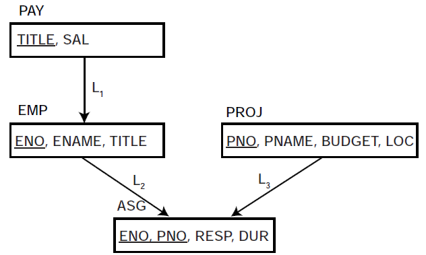

In [3]:
PAY_sql="""\
SELECT * FROM pay
"""

In [4]:
PAY = pd.read_sql(PAY_sql, con=mydb)

In [5]:
display(PAY)

,TITLE,SAL
0,Elect. Eng.,40000.0
1,Mech. Eng.,27000.0
2,Programmer,24000.0
3,Syst. Anal.,34000.0


In [6]:
EMP_sql="""\
SELECT * FROM emp
"""

In [7]:
EMP = pd.read_sql(EMP_sql, con=mydb)

In [8]:
display(EMP)

,ENO,ENAME,TITLE,DOB,Dept
0,E1,J. Doe,Elect. Eng.,1976-07-04,Production
1,E2,M. Smith,Syst. Anal.,1952-03-12,Maintainace
2,E3,A. Lee,Mech. Eng.,1975-09-12,Management
3,E4,J. Miller,Programmer,1981-08-10,Production
4,E5,B. Casey,Syst. Anal.,1955-07-14,Management
5,E6,L. Chu,Elect. Eng.,1943-02-21,Production
6,E7,R. Davis,Mech. Eng.,1980-05-22,Production
7,E8,J. Jones,Syst. Anal.,1950-04-15,Maintainance


In [9]:
EMP1_sql="""\
with 
PAY1 (TITLE,SAL) as (SELECT TITLE,SAL FROM pay where SAL<=30000)
SELECT * FROM  emp join PAY1 on emp.TITLE=PAY1.TITLE ORDER BY ENO
"""

In [10]:
EMP1 = pd.read_sql(EMP1_sql, con=mydb)

In [11]:
display(EMP1)

,ENO,ENAME,TITLE,DOB,Dept,TITLE,SAL
0,E3,A. Lee,Mech. Eng.,1975-09-12,Management,Mech. Eng.,27000.0
1,E4,J. Miller,Programmer,1981-08-10,Production,Programmer,24000.0
2,E7,R. Davis,Mech. Eng.,1980-05-22,Production,Mech. Eng.,27000.0


In [12]:
EMP2_sql="""\
with 
PAY2 (TITLE,SAL) as (SELECT TITLE,SAL FROM pay where SAL>30000)
SELECT * FROM  emp join PAY2 on emp.TITLE=PAY2.TITLE ORDER BY ENO
"""

In [13]:
EMP2 = pd.read_sql(EMP2_sql, con=mydb)

In [14]:
display(EMP2)

,ENO,ENAME,TITLE,DOB,Dept,TITLE,SAL
0,E1,J. Doe,Elect. Eng.,1976-07-04,Production,Elect. Eng.,40000.0
1,E2,M. Smith,Syst. Anal.,1952-03-12,Maintainace,Syst. Anal.,34000.0
2,E5,B. Casey,Syst. Anal.,1955-07-14,Management,Syst. Anal.,34000.0
3,E6,L. Chu,Elect. Eng.,1943-02-21,Production,Elect. Eng.,40000.0
4,E8,J. Jones,Syst. Anal.,1950-04-15,Maintainance,Syst. Anal.,34000.0


In [15]:
RECONSTRUCTED_EMP_sql="""\
(with 
PAY2 (TITLE,SAL) as (SELECT TITLE,SAL FROM pay where SAL>30000)
SELECT * FROM  emp join PAY2 on emp.TITLE=PAY2.TITLE ORDER BY ENO)
UNION
(with 
PAY1 (TITLE,SAL) as (SELECT TITLE,SAL FROM pay where SAL<=30000)
SELECT * FROM  emp join PAY1 on emp.TITLE=PAY1.TITLE ORDER BY ENO)
ORDER BY ENO
"""

In [16]:
RECONSTRUCTED_EMP=pd.read_sql(RECONSTRUCTED_EMP_sql, con=mydb)

In [17]:
display(RECONSTRUCTED_EMP)

,ENO,ENAME,TITLE,DOB,Dept,TITLE,SAL
0,E1,J. Doe,Elect. Eng.,1976-07-04,Production,Elect. Eng.,40000.0
1,E2,M. Smith,Syst. Anal.,1952-03-12,Maintainace,Syst. Anal.,34000.0
2,E3,A. Lee,Mech. Eng.,1975-09-12,Management,Mech. Eng.,27000.0
3,E4,J. Miller,Programmer,1981-08-10,Production,Programmer,24000.0
4,E5,B. Casey,Syst. Anal.,1955-07-14,Management,Syst. Anal.,34000.0
5,E6,L. Chu,Elect. Eng.,1943-02-21,Production,Elect. Eng.,40000.0
6,E7,R. Davis,Mech. Eng.,1980-05-22,Production,Mech. Eng.,27000.0
7,E8,J. Jones,Syst. Anal.,1950-04-15,Maintainance,Syst. Anal.,34000.0
